## **Exercise 1**

1.1 Consider some continuous random variables generated from an unknown distribution stored in 'clean_data.npy'. Fit a univariate Gaussian distribution to this data and estimate the mean and variance of the Gaussian distribution using the maximum likelihood estimator. Report the estimated mean and variance for the Gaussian distribution and plot its probability density function for continuous random variables in the range $[-10, 20]$. Overlay this probability density function curve on the normalised histogram of the data.

**(5 marks)**


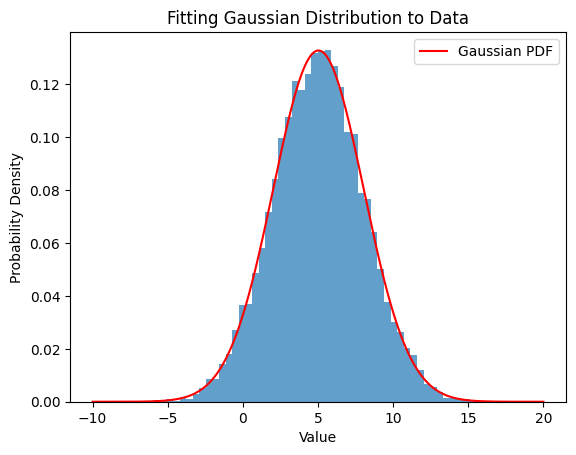

Estimated mean of the data 5.03
Estimated Variance of the data 9.03


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the data
array = np.load('clean_data.npy')

# Get mean and variance
mean = np.mean(array)
variance = np.var(array)

# Generate PDF curve using x, mean and stand. deviation
x = np.linspace(-10, 20, 1000)
pdf = norm.pdf(x, mean, np.sqrt(variance))

# Plot the normalised histogram
plt.hist(array[0], bins=50, density=True, alpha=0.7)



# Overlay the Gaussian curve
plt.plot(x, pdf, 'r', label='Gaussian PDF')

# setting labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Fitting Gaussian Distribution to Data')

# Add legend and show
plt.legend()
plt.show()

# showing estimated Mean and Variance of the data
print("Estimated mean of the data "+str(format(mean,".2f")))
print("Estimated Variance of the data "+str(format(variance,".2f")))

1.2 Next, consider a 'corrupted' version of the data used in the previous exercise, stored in 'corrupted_data.npy'. This new data is affected by some degree of outliers from an unknown source. Repeat the process of fitting a univariate Gaussian distribution to this new data (using MLE) and report the estimated mean and variance of the distribution. Plot its probability density function for continuous random variables in the range $[-10, 35]$. Overlay this probability density function curve on the normalised histogram of the new data (affected by outliers). Comment on how the new Gaussian distribution parameters estimated have changed relative to the previous values estimated in exercise 1.1, and why.

**(5 marks)**

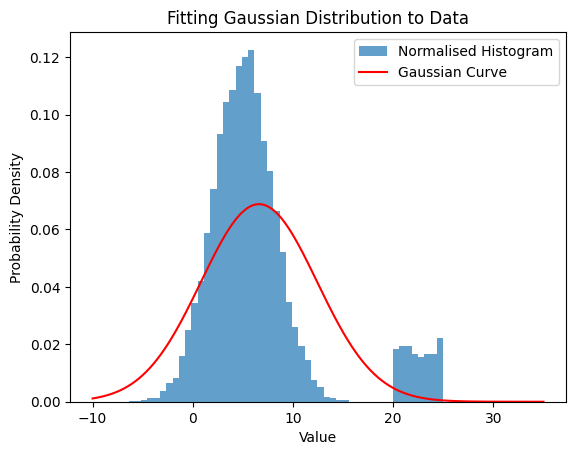

Estimated mean of the data 6.61
Estimated Variance of the data 33.61


"\nIn this data array we can say a set of 'corrupt data' as shown in the histogram on the right. With this data the mean is skewed to the right (larger) which affects the bell curve. \nFurthermore, the probability density is lower as the variance of the data is more spread out. Without these outliers, the bell curve would be tall and thinner.\n"

In [39]:

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the data
array = np.load('corrupted_data.npy')

# Get mean and variance
mean = np.mean(array)
variance = np.var(array)

# Generate PDF curve using x, mean and stand. deviation
x = np.linspace(-10, 35, 1000)
pdf = norm.pdf(x, mean, sqrt(variance))

# Plot the normalised histogram
plt.hist(array, bins=50, density=True, alpha=0.7, label='Normalised Histogram')

# show the Gaussian curve
plt.plot(x, pdf, 'r', label='Gaussian Curve')

# setting labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Fitting Gaussian Distribution to Data')

# Add legend and show
plt.legend()
plt.show()

# showing estimated Mean and Variance of the data
print("Estimated mean of the data "+str(format(mean,".2f")))
print("Estimated Variance of the data "+str(format(variance,".2f")))

"""
In this data array we can say a set of 'corrupt data' as shown in the histogram on the right. With this data the mean is skewed to the right (larger) which affects the bell curve. 
Furthermore, the probability density is lower as the variance of the data is more spread out. Without these outliers, the bell curve would be tall and thinner.
"""

1.3 Fit a distribution to the corrupted data from exercise 1.2 in a manner that is robust to the outliers present. Demonstrate this robustness by comparing the probability density functions of the robust and univariate Gaussian distribution for the corrupted data. Additionally compare the mean and variance estimated for both the clean data (from exercise 1.1) and the corrupted data (from exercise 1.2) based on the robust fit. Explain briefly, how your chosen approach to fitting a robust distribution to the corrupted data achieves robustness.

**(5 marks)**

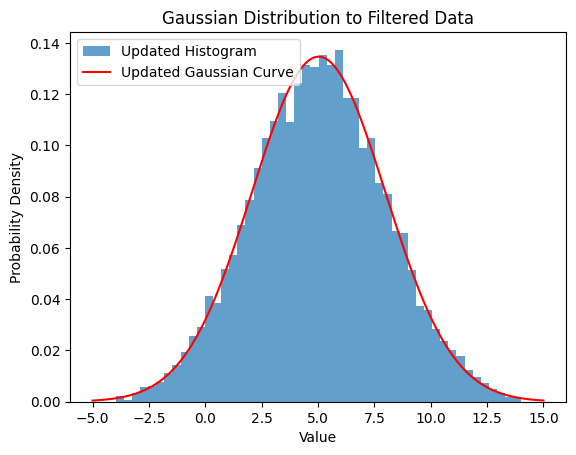

Estimated Mean of the updated data 5.03
Estimated Variance of the updated data 9.03


'\nTo get this new data seta nd ignore the outliers I have decided to set some kind of filter for the data. In this we use a z-score of the data. This is calculated bny taking the absolute value of \nthe data pieces difference to the mean compared to the standard deviation of the corrupted data. In this the new mean is smaller (5.03 compared to 6.61) and a much smaller variation \n(9.03 compared to 33.61). With the use of using a zscore compared to the set threshold of 3 we ignore the outliers in the data. This has created a much more robust set of updated data. \nFinally, I have reduced the range of displayed data to show a better bell curve shape.\n'

In [40]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the data
data = np.load('clean_data.npy')

mean = np.mean(data)
variance = np.var(data)
std_deviation = np.std(data)
threshold = 3.0

# Calculate Zscores and get rid of outliers
zScore = np.abs((data - mean) / std_deviation)
updated_data = data[zScore < threshold]

# Get  updated mean and variance from the updated data
updated_mean = np.mean(updated_data)
updated_variance = np.var(updated_data)

# Generate points for the PDF curve
x = np.linspace(-5, 15, 1000)
pdf_curve = norm.pdf(x, updated_mean, np.sqrt(updated_variance))

#Plotting the  histogram for filtered data
plt.hist(updated_data, bins=50, density=True, alpha=0.7, label='Updated Histogram')

# show Gaussian curve
plt.plot(x, pdf_curve, 'r', label='Updated Gaussian Curve')

# setting labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution to Filtered Data')


plt.legend()
plt.show()

# showing estimated updated Mean and Variance of the data
print("Estimated Mean of the updated data "+str(format(mean,".2f")))
print("Estimated Variance of the updated data "+str(format(variance,".2f")))

"""
To get this new data seta nd ignore the outliers I have decided to set some kind of filter for the data. In this we use a z-score of the data. This is calculated bny taking the absolute value of 
the data pieces difference to the mean compared to the standard deviation of the corrupted data. In this the new mean is smaller (5.03 compared to 6.61) and a much smaller variation 
(9.03 compared to 33.61). With the use of using a zscore compared to the set threshold of 3 we ignore the outliers in the data. This has created a much more robust set of updated data. 
Finally, I have reduced the range of displayed data to show a better bell curve shape.
"""


# **Exercise 2**

2.1 You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array. Each column vector is a 3D shape of a blood vessel of size $(N\times3)$ that has been reshaped into a vector of size $(N*3 \times 1)$. Perform PCA (using the scikit-learn implementation) of the data array and extract the principal components (eigenvectors), the coordinates of the shapes in the new co-ordinate space defined by the eigenvectors, and the singular values associated with each of the eigenvectors.

**(5 marks)**

In [41]:

import numpy as np
from sklearn.decomposition import PCA

# Load the data array
shape_array = np.load('shape_array.npy')

# For each column get and print the eigenvectors
for i in range(7):
    # Getting column i in array
    column = shape_array[:, i]
    # Reshape the array to the desired size
    reshape_array = column.reshape(-1, 3)
    # Start a PCA class with 3 components
    pca = PCA(n_components=3)
    # Fit  and transform data to get the eigenvectors
    pca.fit(reshape_array)
    principal_components = pca.transform(reshape_array)
    # Get the eigenvectors and print
    eigenvectors = pca.components_
    print("Column:",i,", Eigenvectors:\n",eigenvectors)

    # Get coordinates defined in the new space
    coordinates = pca.transform(reshape_array)
    print("Coordinates in New Space:\n",coordinates)

    # Getting explained variance
    explained_variance = pca.explained_variance_ratio_
    print("Explained variance:\n",explained_variance)


Column: 0 , Eigenvectors:
 [[-0.01621831  0.20333113 -0.97897565]
 [-0.18902034 -0.96207315 -0.19668913]
 [ 0.9818393  -0.18185633 -0.05403692]]
Coordinates in New Space:
 [[-0.00072896  0.00857878  0.00353328]
 [ 0.00051991  0.00909229  0.00260549]
 [ 0.00155275  0.01049975  0.00188988]
 ...
 [ 0.02115586  0.007484   -0.00150643]
 [ 0.02212192  0.0062459   0.00029521]
 [ 0.02055686  0.00719761  0.00189067]]
Explained variance:
 [0.6817465  0.29382482 0.02442874]
Column: 1 , Eigenvectors:
 [[-0.00445746  0.26192558 -0.9650779 ]
 [-0.23518936 -0.9382905  -0.2535691 ]
 [ 0.9719394  -0.22584568 -0.06578449]]
Coordinates in New Space:
 [[-0.00348751  0.00455222  0.00429538]
 [-0.00283638  0.00456488  0.00362819]
 [-0.00202432  0.00476816  0.00303102]
 ...
 [ 0.02226428  0.00639755 -0.00196287]
 [ 0.02298992  0.00562689 -0.00079927]
 [ 0.02218967  0.00656285  0.00016069]]
Explained variance:
 [0.7763873  0.20332769 0.02028499]
Column: 2 , Eigenvectors:
 [[-0.02235706  0.15485746 -0.98768383

2.2 Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Compare the obtained eigenvalues with the singular values estimated from PCA in the previous step. Report any differences you might find between the two and briefly explain the reason for any differences. Find the new coordinates of each shape (i.e. column in the data array) in the new coordinate space defined by the estimated eigenvectors.

**(5 marks)**

In [42]:
import numpy as np
from sklearn.decomposition import PCA

# Load the data from the numpy array file
shape_array = np.load('shape_array.npy')

# For each column get the eigenvectors and eigenvalues
for i in range(7):
    # Get the column
    column = shape_array[:, i]

    # Reshape the column 
    reshaped_column = column.reshape(-1,3)

    # Perform eigendecomposition of the covariance matrix
    covariance_matrix = np.cov(reshaped_column, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    print("Column:",i,"eigenvalues:\n",eigenvalues)

    # find new coordinates of the shape
    coordinates = np.dot(reshaped_column, eigenvectors)
    print("Column:",i,"coordinates:\n",coordinates)


Column: 0 eigenvalues:
 [3.97280373e-06 4.77842543e-05 1.10871293e-04]
Column: 0 coordinates:
 [[ 0.00353455 -0.00857714  0.00074663]
 [ 0.00260677 -0.00909066 -0.00050225]
 [ 0.00189116 -0.01049812 -0.00153509]
 ...
 [-0.00150516 -0.00748236 -0.0211382 ]
 [ 0.00029649 -0.00624426 -0.02210425]
 [ 0.00189195 -0.00719598 -0.0205392 ]]
Column: 1 eigenvalues:
 [3.29799625e-06 3.30576536e-05 1.26227467e-04]
Column: 1 coordinates:
 [[ 0.00429991 -0.00455254  0.00350657]
 [ 0.00363271 -0.00456519  0.00285545]
 [ 0.00303555 -0.00476847  0.00204338]
 ...
 [-0.00195834 -0.00639786 -0.02224522]
 [-0.00079475 -0.0056272  -0.02297085]
 [ 0.00016521 -0.00656316 -0.0221706 ]]
Column: 2 eigenvalues:
 [2.49489686e-06 3.08066452e-05 1.29158362e-04]
Column: 2 coordinates:
 [[ 0.00134847 -0.00439182  0.00057159]
 [ 0.0001398  -0.0047247  -0.00039257]
 [-0.00061652 -0.00578249 -0.00138731]
 ...
 [-0.00038911 -0.00404481 -0.02419671]
 [ 0.00086746 -0.00288876 -0.024314  ]
 [ 0.00197469 -0.00404524 -0.023632

2.3 Reconstruct any one shape from the provided data array using (a) new coordinates estimated from PCA in 2.1 and (b) the new coordinates estimated using eigendecomposition in 2.2. Reshape the resulting vectors from (a) and (b) into a 3D set of points of size $(N\times3)$ that represent reconstructions of the original shape. Overlay the two resulting shapes and briefly comment on their similarity. Finally, in a couple of sentences explain why PCA is often described as an approach for dimensionality reduction/data compression.

**(5 marks)**

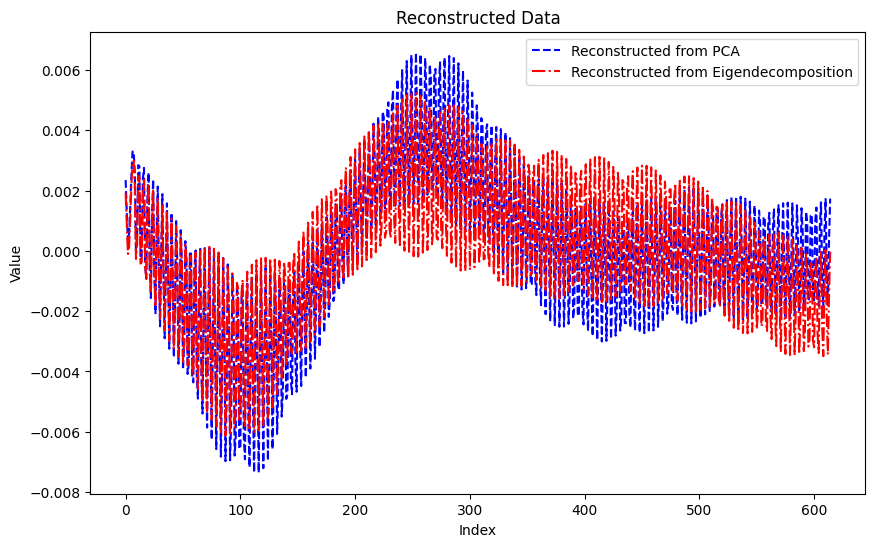

'\nIn the reconstruction of column 0 from the array, we can make a few observations. Firstly, both reconstructions follow similar shapes from the first to last index. However, the reconstruction\nfrom PCA shows a more accurate reconstruction. This can be shown by preserving the shape better as well as the data points being more compact. From this information we can come to the conclusion \nthat PCA is better from reconstruction of Eigenvectors. This is because the data compression is saved with more detail to create a more accurate reconstruction.\n'

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the data from the file
data = np.load('shape_array.npy')

# Get and reshape column 0 (chosen column to reshape)
column = data[:, 0]
reshaped_column = column.reshape(-1,3)

# performing PCA
pca = PCA(n_components=3)

# Apply PCA compression
pca.fit(reshape_array)
principal_components = pca.transform(reshape_array)

# Reconstruct pca
reconstructed_pca = pca.inverse_transform(principal_components)

# Perform eigendecomposition of the covariance matrix
covariance_matrix = np.cov(reshaped_column, rowvar=False)
eigenvalues, eigenvector = np.linalg.eigh(covariance_matrix)

# Project the data onto the eigenvector from column 0
compressed_eigen = np.dot(reshaped_column, eigenvector)

# Reconstruct data from eigendecomposition
reconstruc_eigen = np.dot(compressed_eigen, eigenvectors.T)

# Overlaying both reconstructions 
plt.figure(figsize=(10, 6))

# Plot the reconstructed data 
plt.plot(reconstructed_pca[:, 0], label='Reconstructed from PCA', linestyle='--', color='blue')
plt.plot(reconstruc_eigen[:, 0], label='Reconstructed from Eigendecomposition', linestyle='-.', color='red')

plt.title('Reconstructed Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

"""
In the reconstruction of column 0 from the array, we can make a few observations. Firstly, both reconstructions follow similar shapes from the first to last index. However, the reconstruction
from PCA shows a more accurate reconstruction. This can be shown by preserving the shape better as well as the data points being more compact. From this information we can come to the conclusion 
that PCA is better from reconstruction of Eigenvectors. This is because the data compression is saved with more detail to create a more accurate reconstruction.
"""

# **Exercise 3: Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.


The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

In [44]:
import os
import pandas as pd

## Define paths to the training data and targets files
#training_data_path = os.root_dir + 'Training_data.csv'
#training_targets_path = os.root_dir + 'Training_data_targets.csv'

**Exercise 3.1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

**(5 marks)**

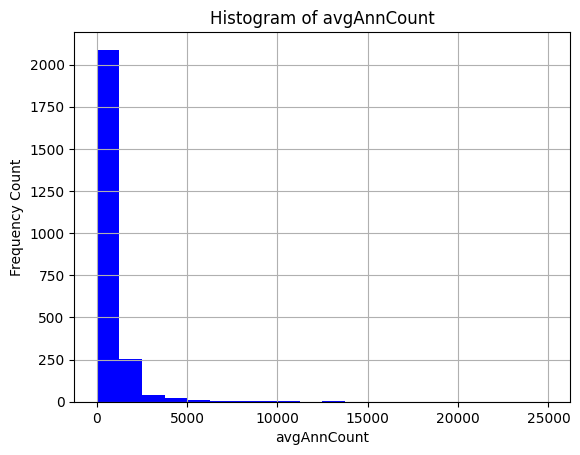

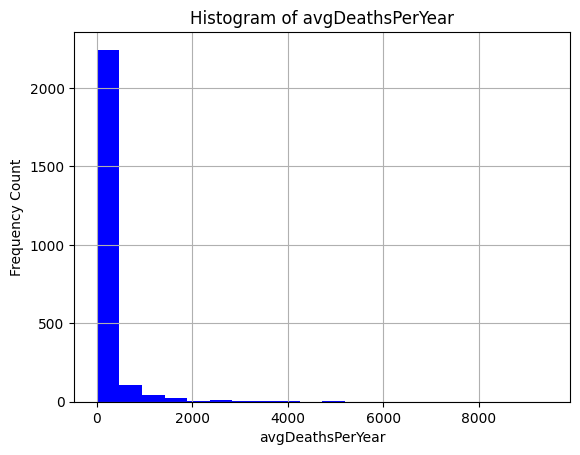

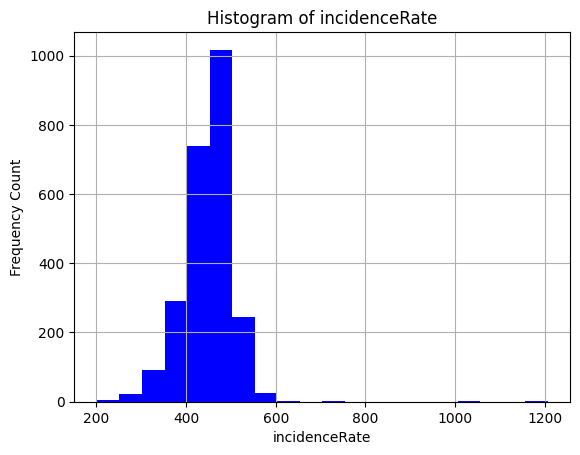

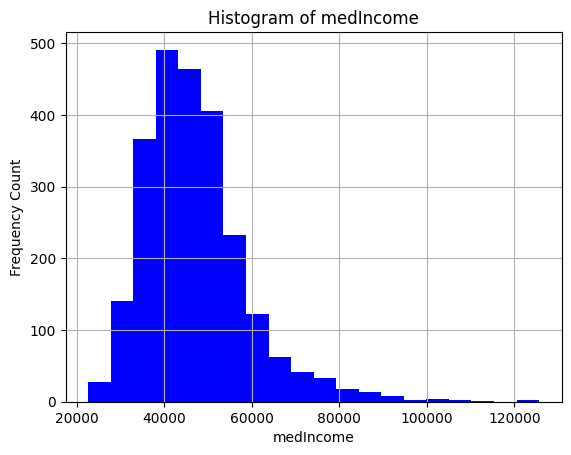

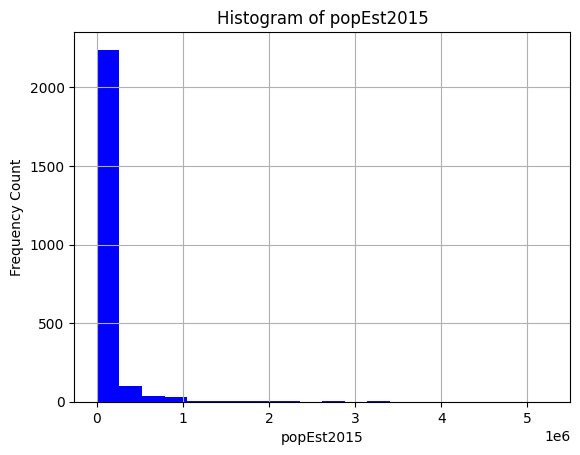

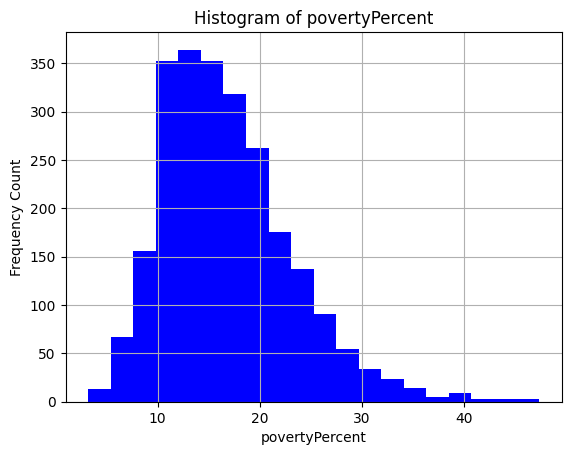

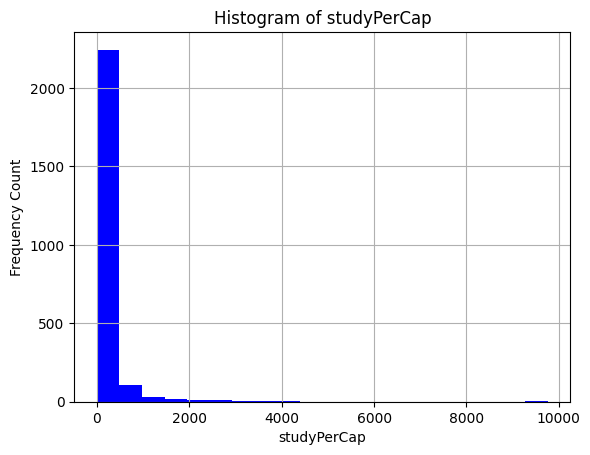

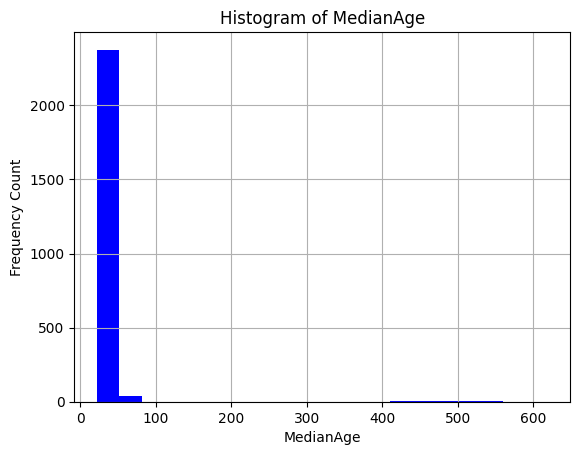

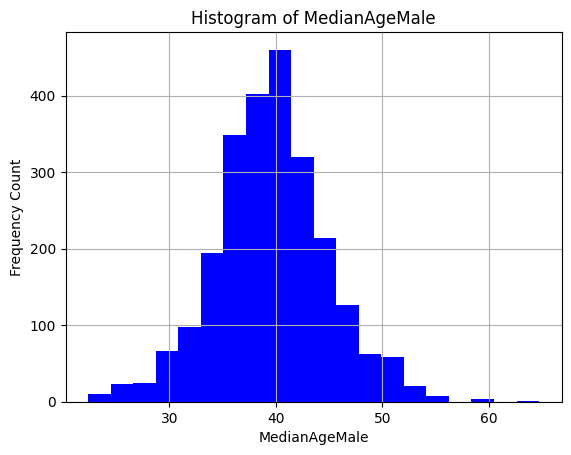

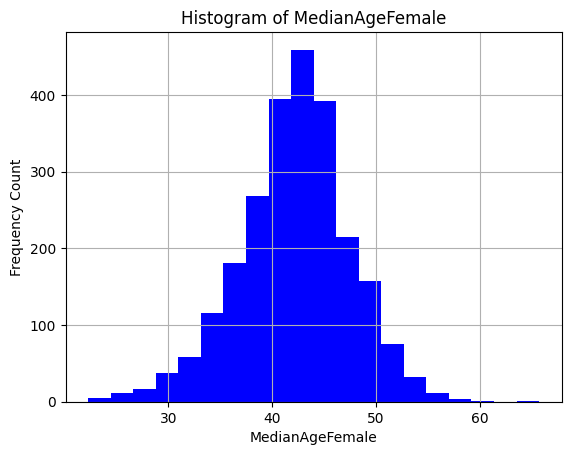

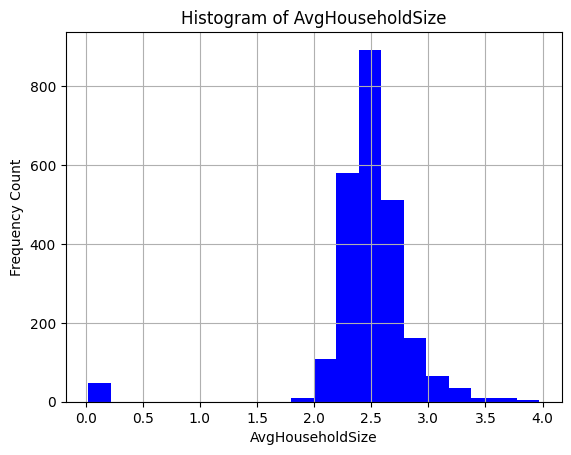

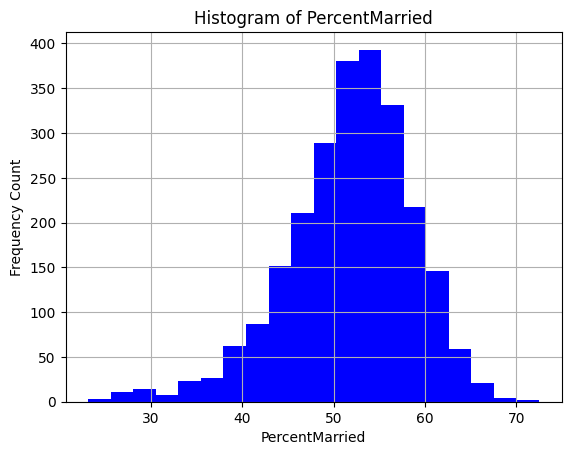

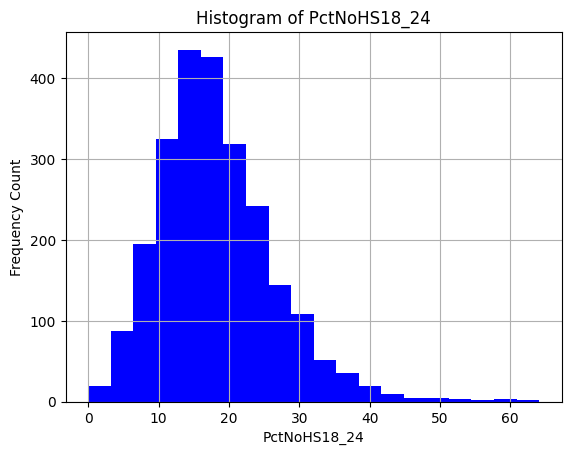

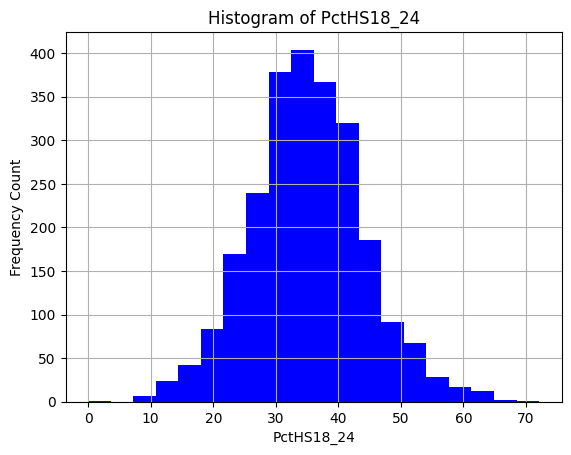

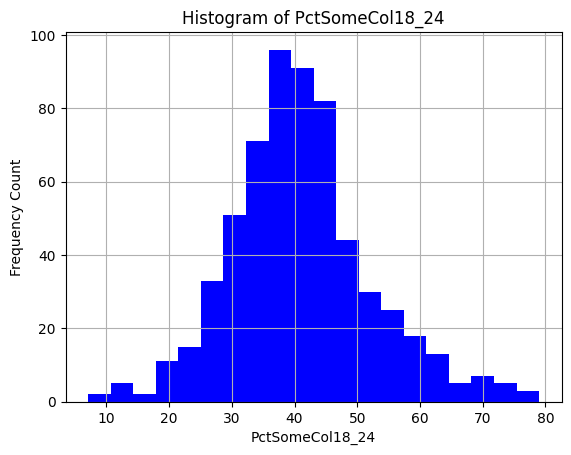

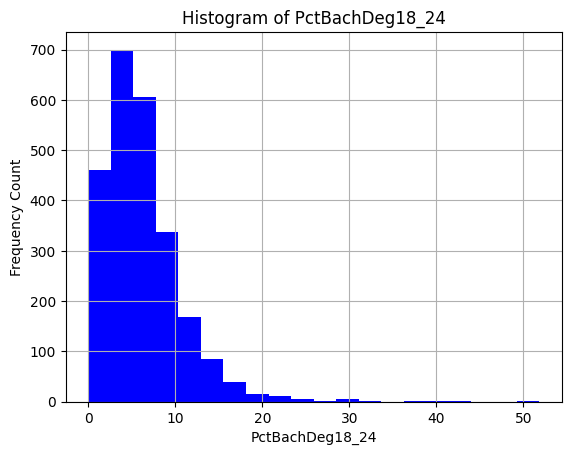

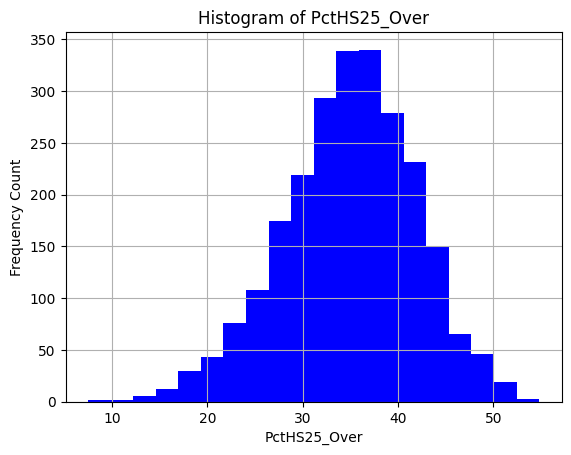

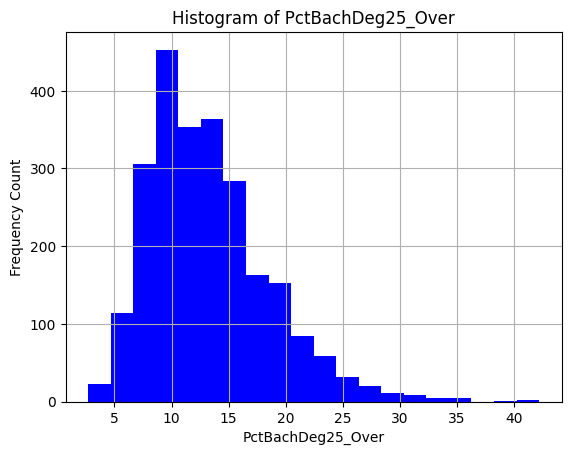

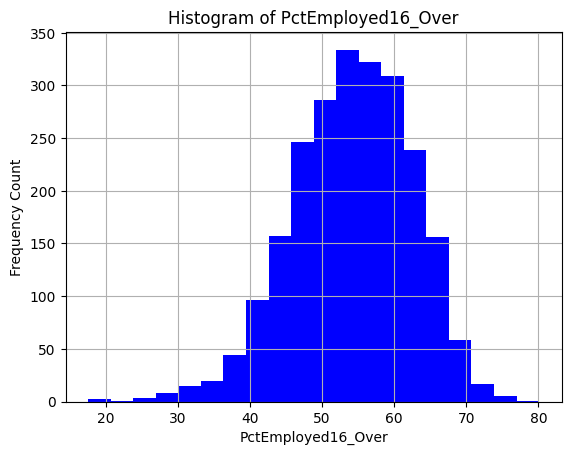

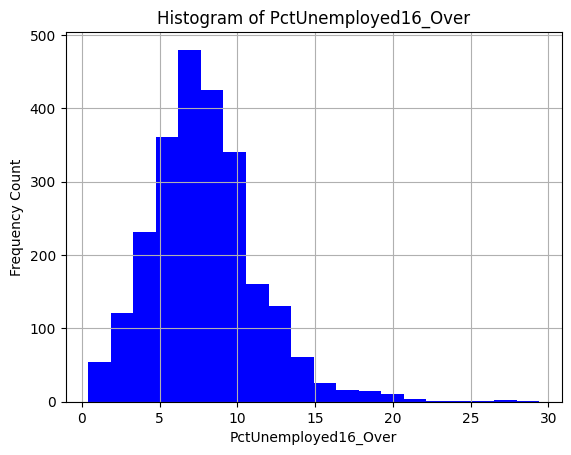

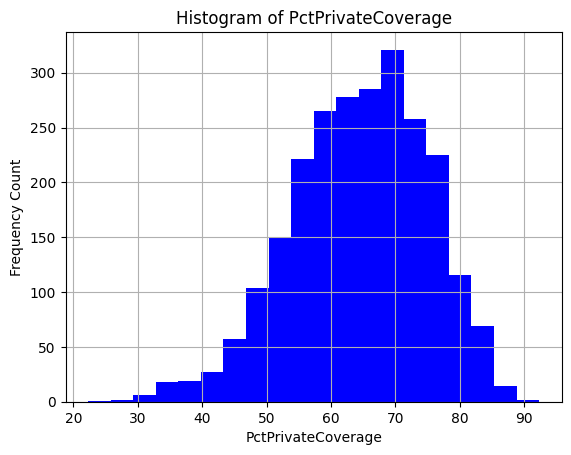

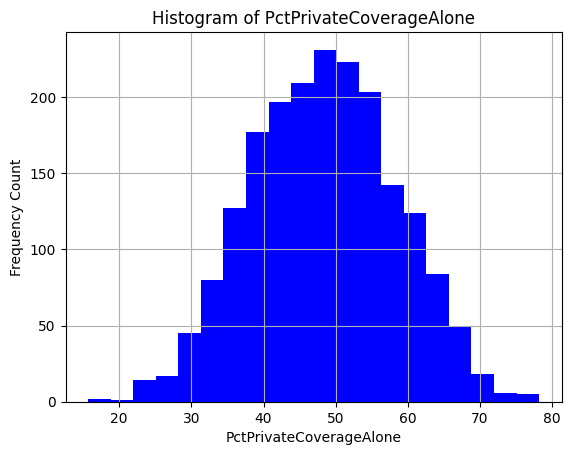

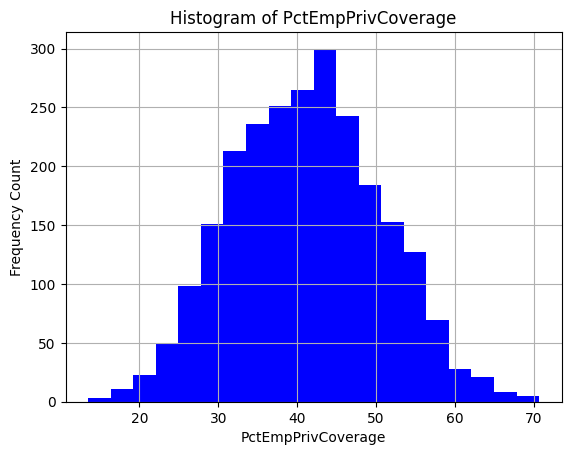

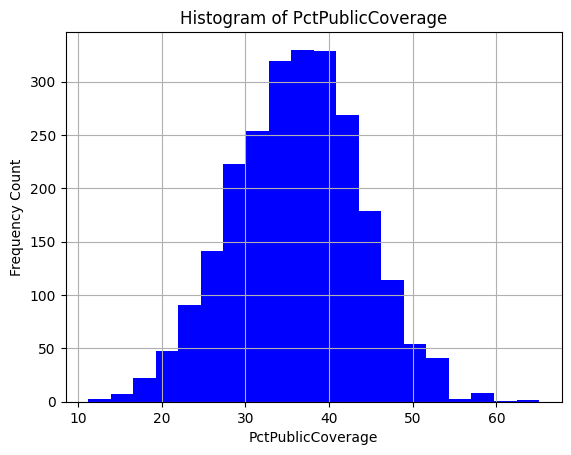

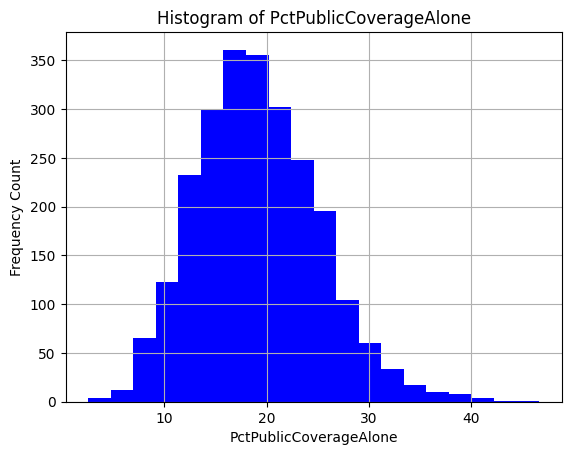

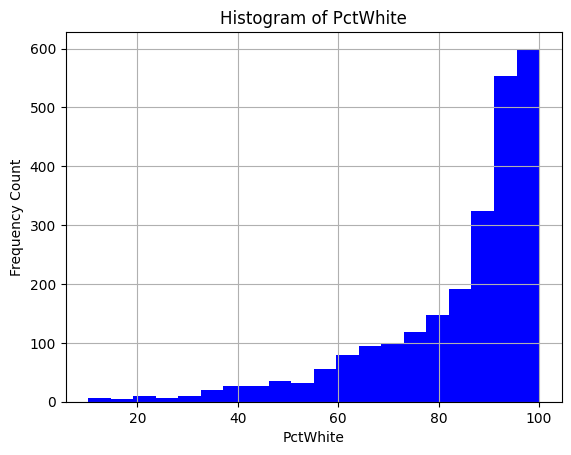

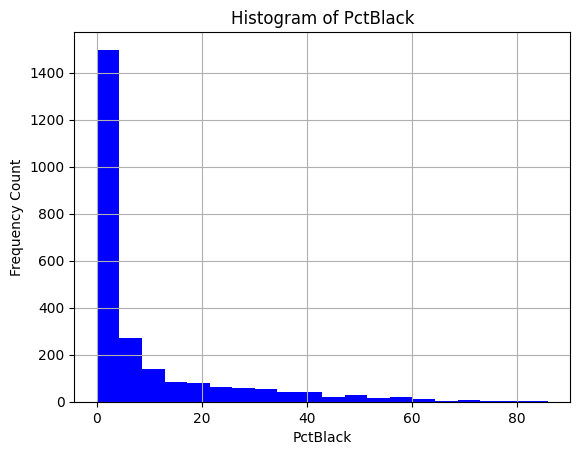

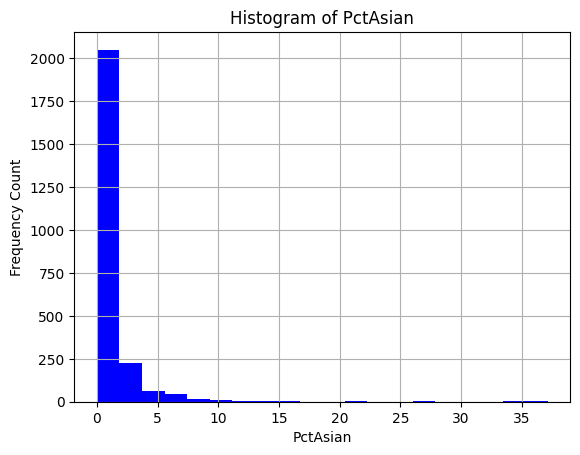

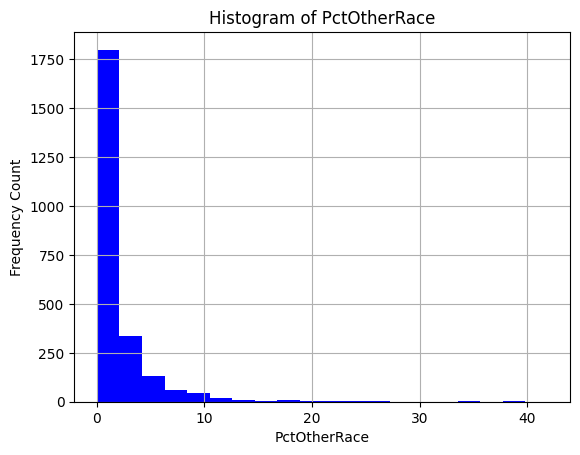

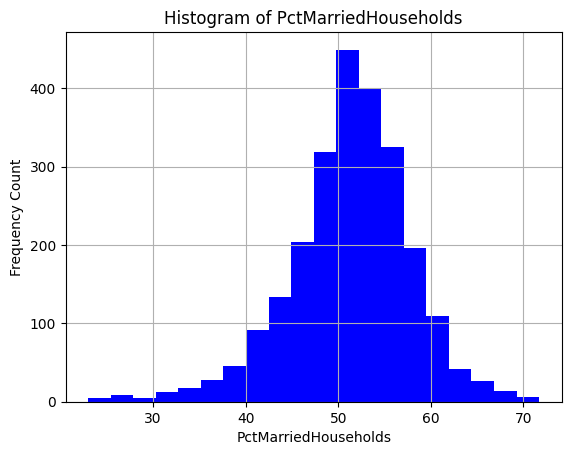

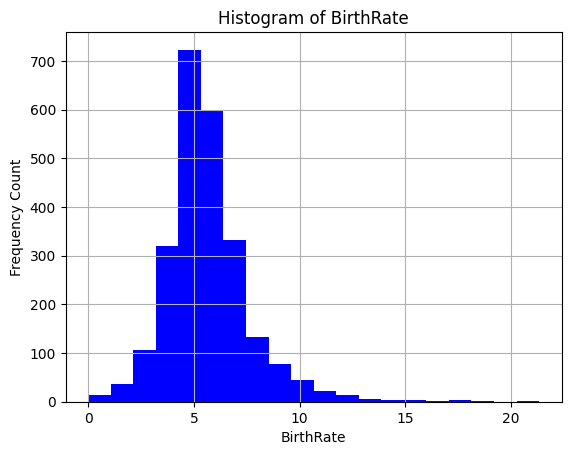

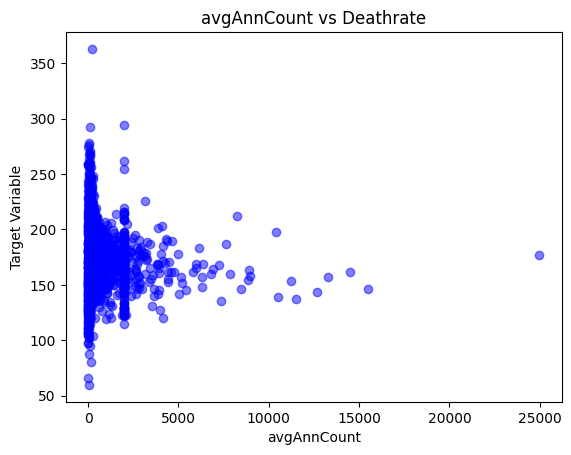

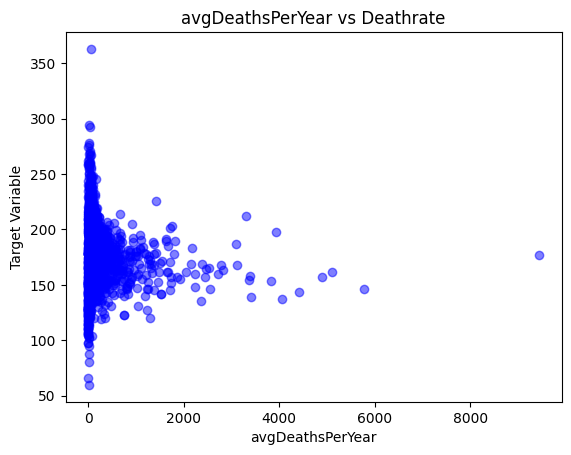

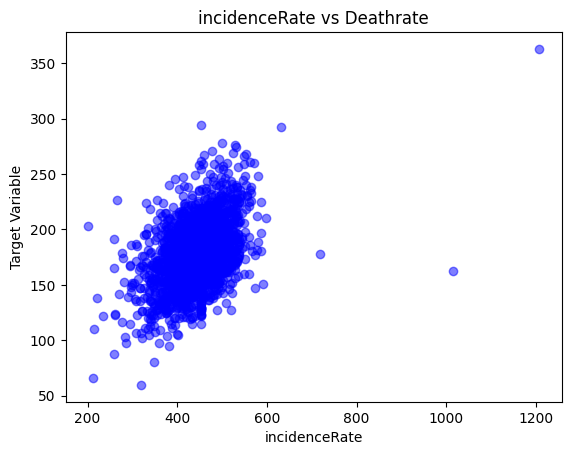

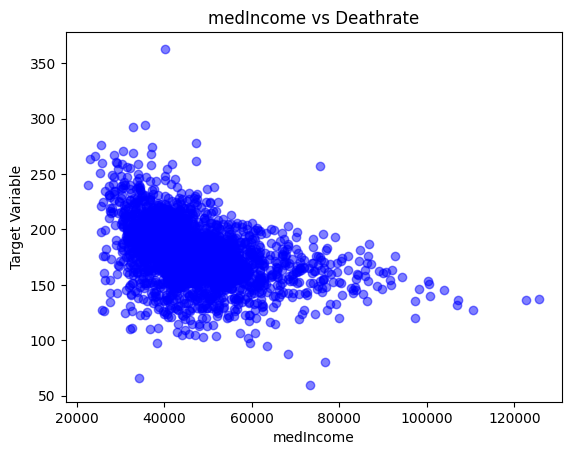

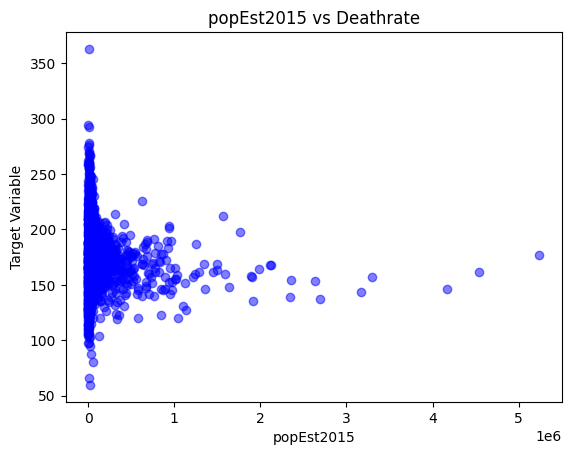

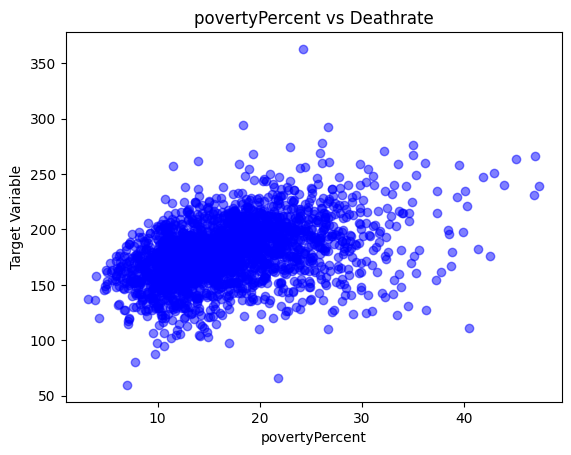

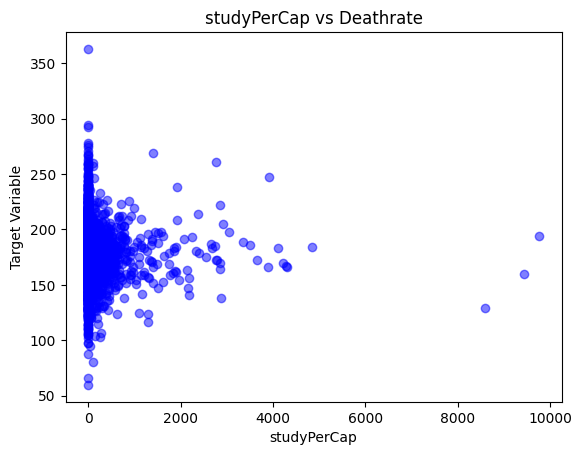

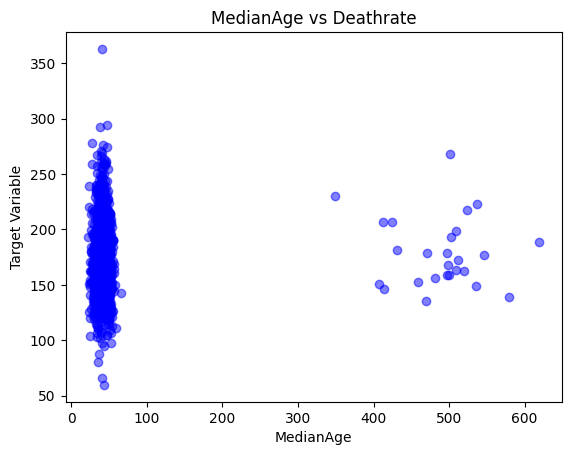

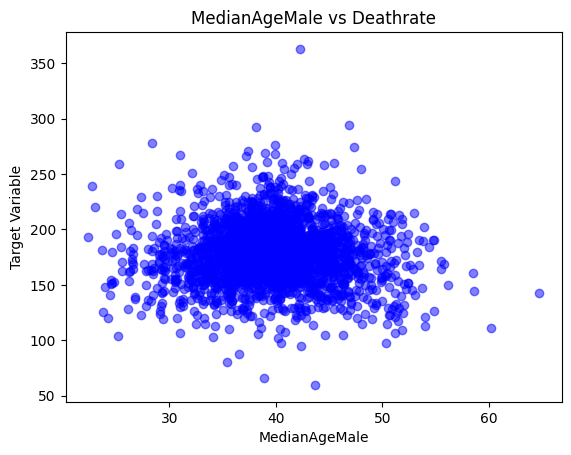

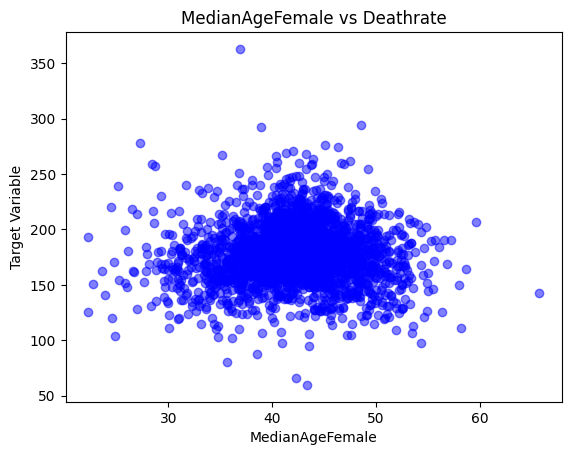

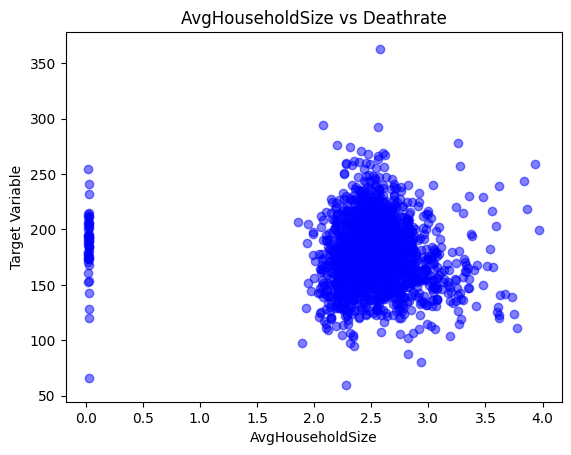

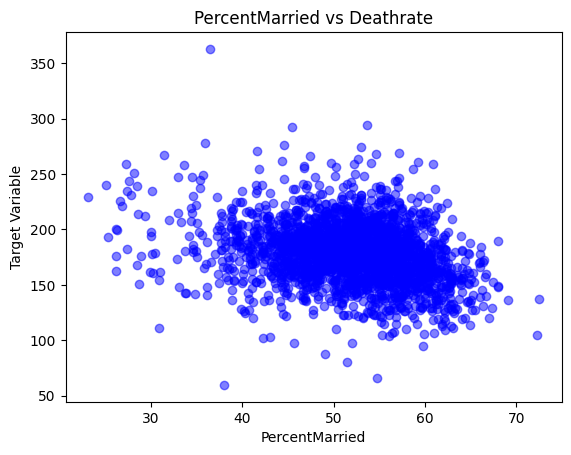

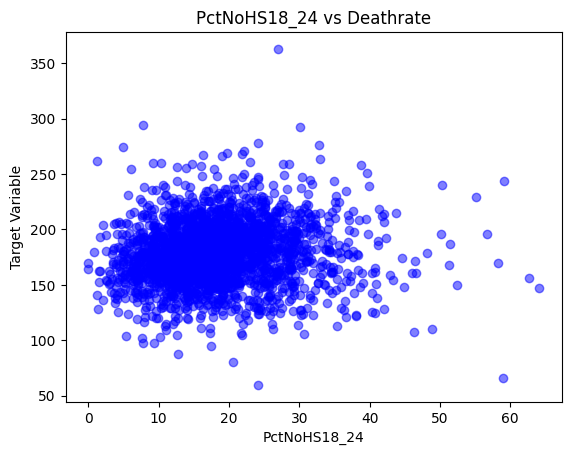

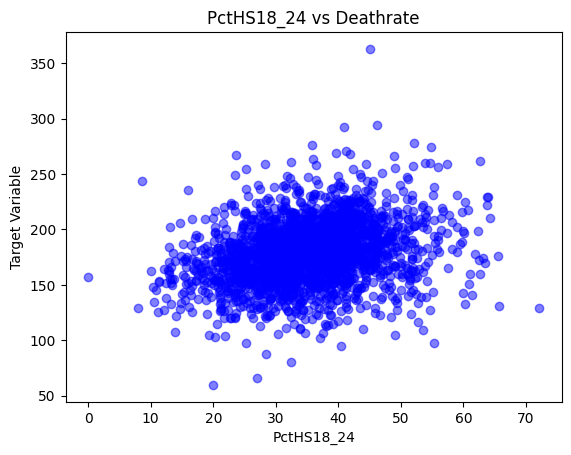

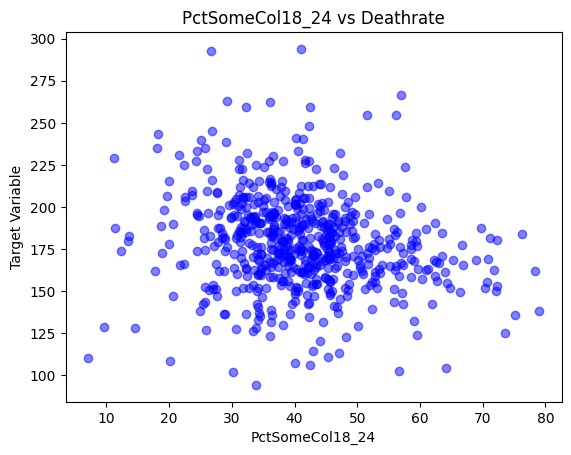

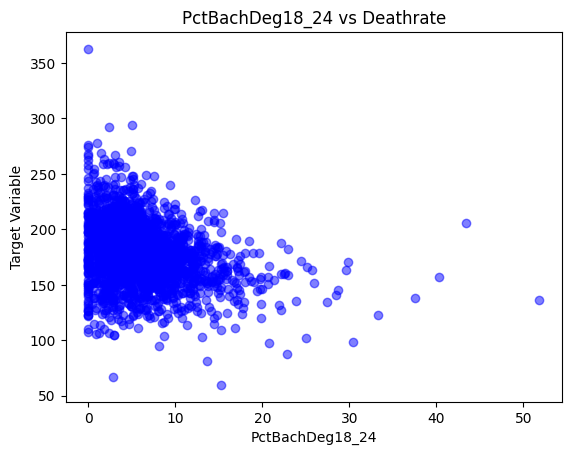

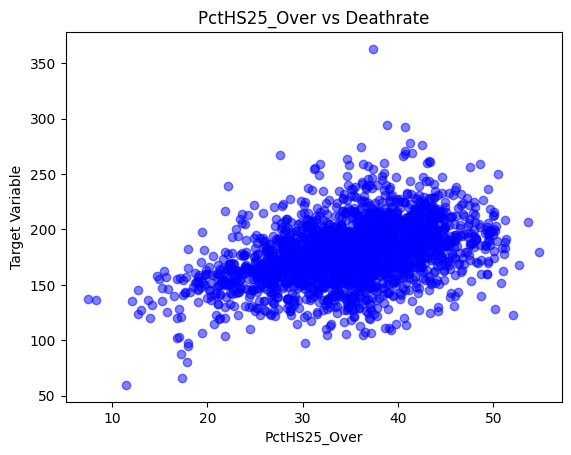

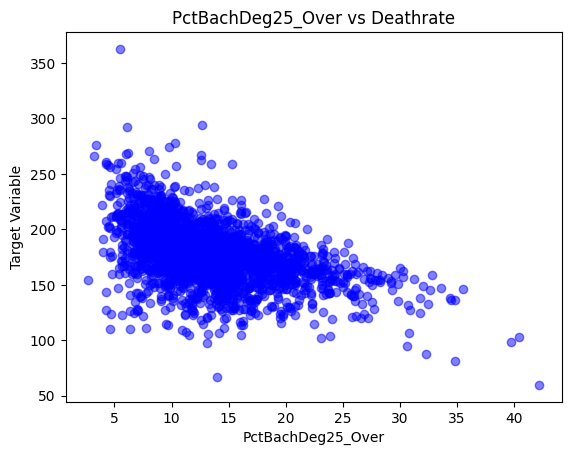

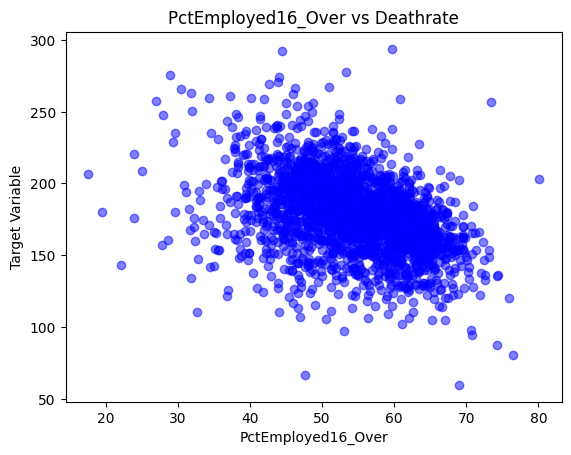

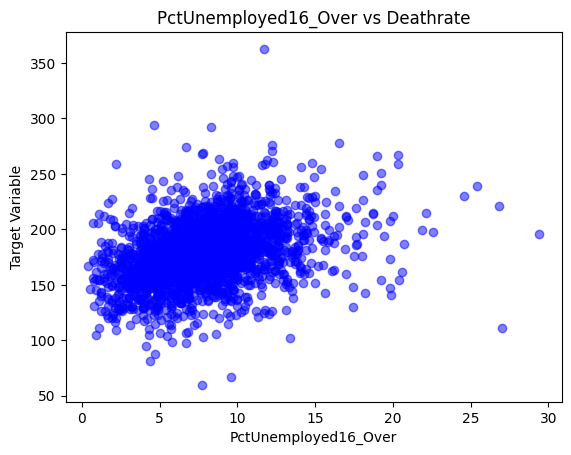

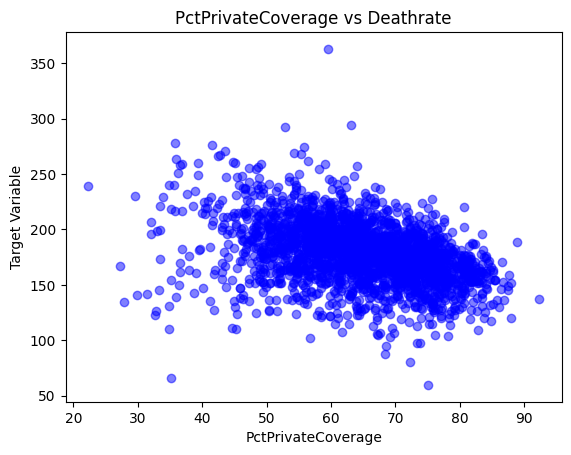

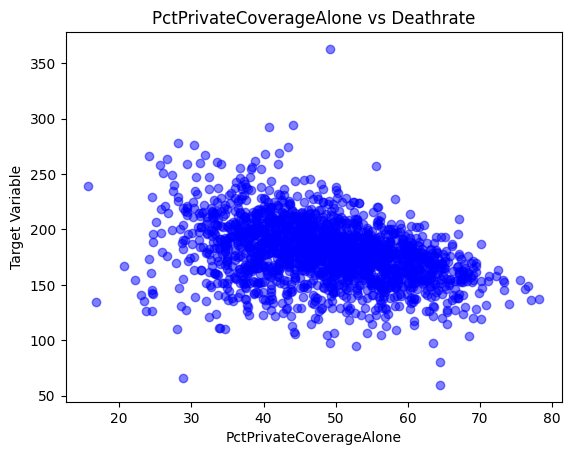

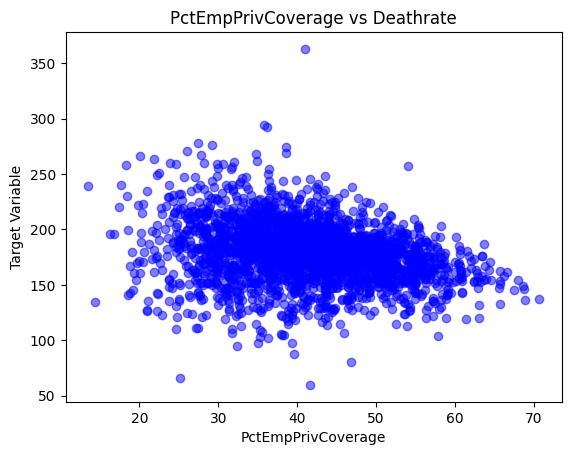

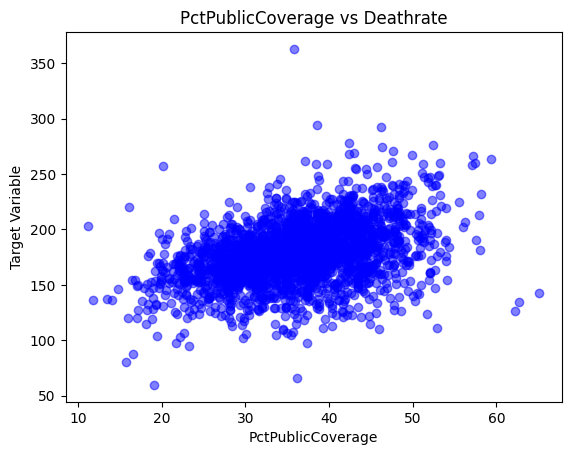

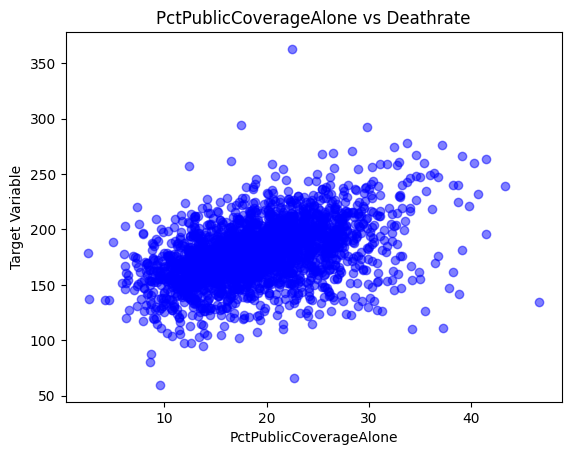

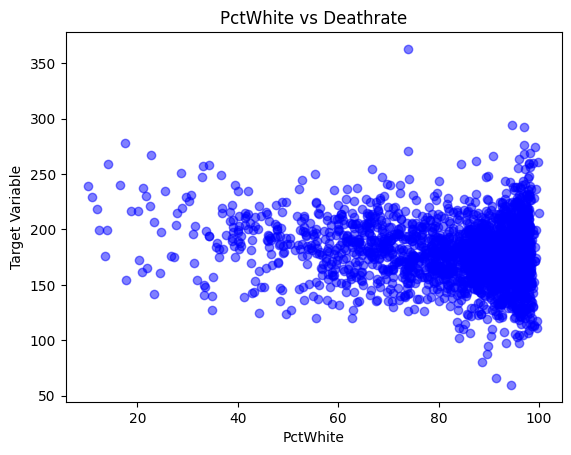

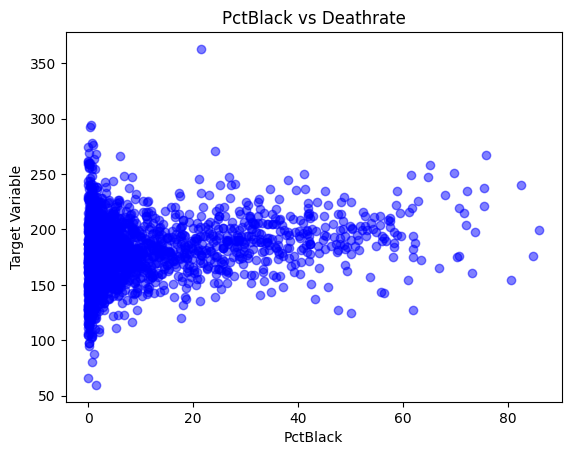

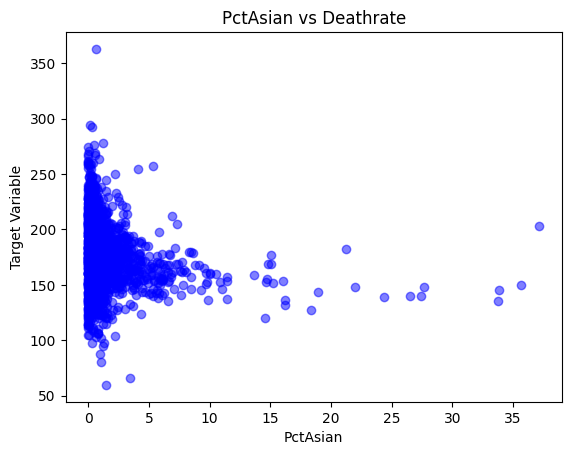

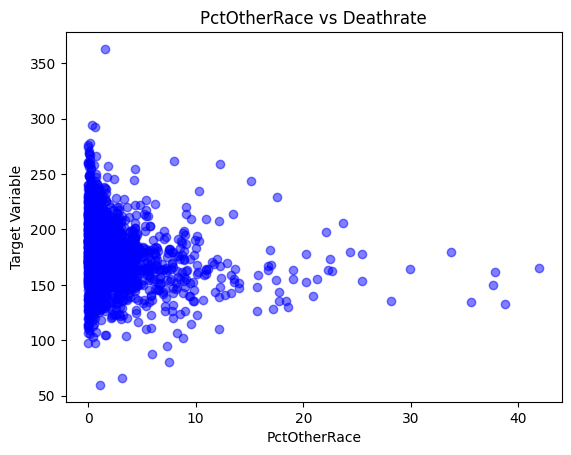

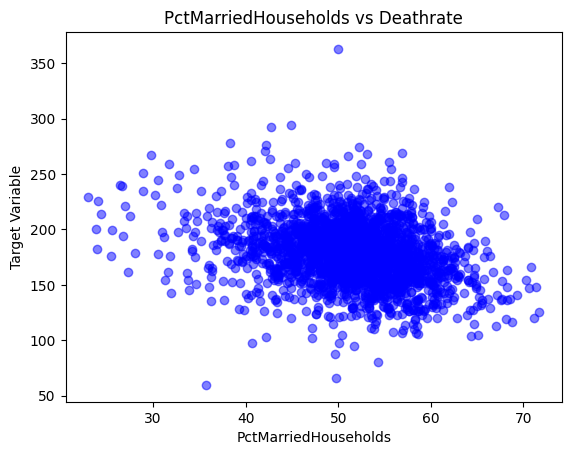

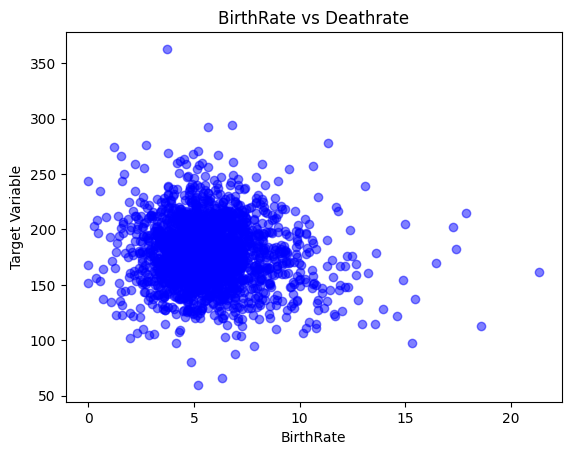

Top 5 correlations:
PctBachDeg25_Over         0.491411
incidenceRate             0.443983
PctPublicCoverageAlone    0.439734
medIncome                 0.416607
povertyPercent            0.413260
Name: TARGET_deathRate, dtype: float64


In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Define paths to the training data and targets files
training_data_path = pd.read_csv('Training_data.csv')
training_targets_path =pd.read_csv('Training_data_targets.csv')


for column in training_data_path.columns:
    # Drawing each histogram of the features
    training_data_path[column].hist(bins=20, color='blue')

    plt.title(str('Histogram of ' + column))
    plt.xlabel(column)
    plt.ylabel('Frequency Count')
    plt.show()


# Combine training data and targets for the correlations
df = pd.concat([training_data_path, training_targets_path], axis=1)

# Get correlations with the target variable
correlations = df.corr()['TARGET_deathRate'].abs().sort_values(ascending=False)

# Get the top 5 correlations
top_correlations = correlations[1:6] 
# Plot Scatter graphs for all features
for column in training_data_path.columns:
    plt.scatter(training_data_path[column], training_targets_path['TARGET_deathRate'], alpha=0.5, color='blue')
    # Set titles and labels
    plt.title(str(column+ ' vs Deathrate'))
    plt.xlabel(column)
    plt.ylabel('Target Variable')
    plt.show()

# Print top 5 correlations
print("Top 5 correlations:")
print(top_correlations)
# Write comments on the results


*   There seem to be errors/outliers in the median age features (MedianAge) with values >> 100. This is clearly an error and needs to be corrected prior to fitting regression models. (1.5 marks for code above and this discussion)

*   Top five features with strongest correlations to targets are: incidenceRate, PctBachDeg25_Over, PctPublicCoverageAlone, medIncome and povertyPercent (2 marks for this description and code above).


*   medIncome and povertyPercent are negatively correlated to each other as you would expect.
*   povertyPercent and PctBachDeg25_Over are also negatively correlated highlighting that counties with higher degrees of poverty have fewer Bachelor graduates by the age of 25. povertyPercent also shows a strong positive correlation with PctPublicCoverageAlone, indicating that poverty stricken counties are less likely to be able to afford private healthcare coverage.
*   Similarly, PctBachDeg25_Over is negatively correlated with PctPublicCoverageAlone and positively correlated with medIncome. (1.5 marks for discussion of at least two sets of features that show correlations and code above)

**Exercise 3.2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (5 marks)

In [46]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# training data and targets files
training_data_path = pd.read_csv('Training_data.csv')
training_targets_path = pd.read_csv('Training_data_targets.csv')

# Split data to a training and test set 
X_train, X_test, y_train, y_test = train_test_split(training_data_path, training_targets_path, test_size=0.2, random_state=42)

# Create pipeline 
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()),  
    ('regressor', RandomForestRegressor())
])

# Fit the pipeline model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)



c:\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


**Exercise 3.3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Report the overall performance of the best regression model identified. Include code for all steps above. (10 marks)

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# paths to the training data and targets file
training_data_path = pd.read_csv('Training_data.csv')
training_targets_path = pd.read_csv('Training_data_targets.csv')


# Split the data
X_train, X_test, y_train, y_test = train_test_split(training_data_path, training_targets_path, test_size=0.2, random_state=42)

# Create pipeline with an imputer and  scaler
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Perform OLS regression
OLS_pipeline = Pipeline(steps=[
    ('preprocessor', pipeline),
    ('regressor', LinearRegression())
])
# Fit and predict values to the training set from the test set
OLS_pipeline.fit(X_train, y_train)
OLS_predicted_values = OLS_pipeline.predict(X_test)
# Calculate MSE 
OLS_MSE = mean_squared_error(y_test, OLS_predicted_values)
print('OLS Mean Squared Error: '+str(OLS_MSE))

# Perform Lasso regression
# Create Lasso pipeline
Lasso_pipeline = Pipeline(steps=[
    ('preprocessor', pipeline),
    ('regressor', Lasso())
])
# Values for the hyperparameters
lambda_values = [0.001,0.01,0.1,1,10,20,50]
# Setting 1st cost function MSE to 0  and an initial large cost function MSE
temp_MSE = 0
Lasso_MSE = 1000000000
for i in lambda_values:
    # Fit Lasso regression to the train set
    Lasso_pipeline.set_params(regressor__alpha =  i).fit(X_train, y_train)
    # Predict using test set
    Lasso_predicted = Lasso_pipeline.predict(X_test)
    #Calculate MSE
    temp_MSE = mean_squared_error(y_test,Lasso_predicted)
    # Check if we have a new lower MSE
    if (temp_MSE < Lasso_MSE):
        Lasso_MSE = temp_MSE    
print('Lasso Mean Squared Error: '+str(Lasso_MSE))

# Perform Ridge Regression
Ridge_pipeline = Pipeline(steps=[
    ('preprocessor', pipeline),
    ('regressor', Ridge())
])
# Values for the hyperparameters
lambda_values = [0.001,0.01,0.1,1,10,20,50]
# Setting 1st cost function MSE to 0  and an initial large cost function MSE
temp_MSE = 0
Ridge_MSE = 1000000000
for i in lambda_values:
    # Fit Lasso regression to the train set
    Ridge_pipeline.set_params(regressor__alpha =  i).fit(X_train, y_train)
    # Predict using test set
    Ridge_predicted = Ridge_pipeline.predict(X_test)
    #Calculate MSE
    temp_MSE = mean_squared_error(y_test,Ridge_predicted)
    # Check if we have a new lower MSE
    if (temp_MSE < Ridge_MSE):
        Ridge_MSE = temp_MSE    
print('Ridge Mean Squared Error: '+str(Ridge_MSE))

# Explain results
"""
As shown by the results, Lasso Regression is best for this experiment, as it has the lowest MSE. However, as all three regression are very close together, the difference 
in these three regression methods is very small. For Ridge and Lasso reggression, we test multiple values for the hyperparameter to see which produces the lowest MSE.
"""

OLS Mean Squared Error: 349.8094933205244
Lasso Mean Squared Error: 349.80774775729947
Ridge Mean Squared Error: 349.80949514323584


'\nAs shown by the results, Lasso Regression is best for this experiment, as it has the lowest MSE. However, as all three regression are very close together, the difference \nin these three regression methods is very small. For Ridge and Lasso reggression, we test multiple values for the hyperparameter to see which produces the lowest MSE.\n'